# The Oscilloscope is a Tektronix TBS 2000 Series   TBS2104  C023206 100MHz 1GS/s

### I had to brew install usblib you need to do some other stuff because it doesnt like arm so have brew installed then run
### arch -x86_64 /bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install.sh)"
### Then arch -x86_64 brew install

In [4]:
import pyvisa
# from ThorlabsPM100 import ThorlabsPM100 # go and look at documentation to see the other functions that can be used to change things on the power meter. You need to pip install this
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Connect to Oscillascope

In [9]:
scope.close()

In [5]:
rm = pyvisa.ResourceManager()# This just looks at all the USB stuff that is on the computer
print(rm.list_resources())# this will print out all the USB connected device you need to manually work out what is what. Unplug and re-run to see what is on the list and what isn't

scope = rm.open_resource('USB0::1689::966::C023206::INSTR',timeout=100000000)
# scope = rm.open_resource('USB0::0x0699::0x0372::C010259::INSTR',timeout=100000000)

('USB0::1689::966::C023206::0::INSTR',)


/Users/s4356803/opt/anaconda3/lib/python3.9/site-packages/pyvisa_py/tcpip.py:121: UserWarning: TCPIP::hislip resource discovery requires the zeroconf package to be installed... try 'pip install zeroconf'
  warnings.warn(


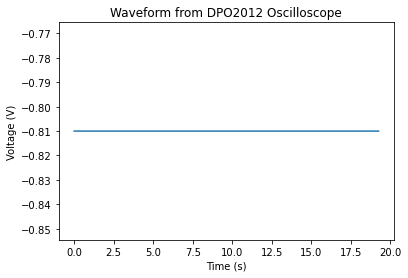

In [16]:
# # Connect to the oscilloscope
# rm = pyvisa.ResourceManager()
# scope = rm.open_resource('USB0::0x0699::0x0372::C010259::INSTR',timeout=100000000)  # Change the address to your oscilloscope's address

# Send command to the oscilloscope to prepare data transfer
scope.write('DATA:SOU CH3')  # Select channel
scope.write('DATA:WIDTH 1')  # Set data width
scope.write('DATA:ENC RPB')  # Set data encoding

# Retrieve the data
scope.write('CURVE?')
data = scope.read_raw()
headerlen = 2 + int(data[1])
header = data[:headerlen]
waveform_data = data[headerlen:-1]
waveform = np.array(list(waveform_data))

# Get scale factors to convert waveform to proper units
yscale = float(scope.query('WFMPRE:YMULT?'))
yoffset = float(scope.query('WFMPRE:YOFF?'))
xscale = float(scope.query('WFMPRE:XINCR?'))

voltages = (waveform - yoffset) * yscale
xlen = len(voltages)
time = np.arange(0, xlen*xscale, xscale)

# Plot the data
plt.figure(1)
plt.plot(time, voltages)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Waveform from DPO2012 Oscilloscope')
plt.show()

# don't need to close until we are finished with it.
# Close the connection
# scope.close()

# from numpy.fft import fft, ifft, fftshift
# from scipy.fft import fft, fftfreq, fftshift,ifftshift, fft2,ifft2,rfft2,irfft2


# T = time[len(time)-1]-time[0]
# X = fftshift(fft(voltages))
# N = len(X)
# dt = T/N
# Nq = 1/(2*dt)
# freq = np.arange(-Nq,Nq,1/T)
# plt.figure(2,figsize = (16,8))
# # plt.figure(figsize = (16,8))
# plt.plot(freq,np.abs(X))

# plt.xlim([0,2e4])
# plt.ylim([0,0.15])

In [15]:
scope.close()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Function to convert a matplotlib plot to an OpenCV image
def plot_to_opencv_img(fig):
    canvas = FigureCanvas(fig)
    canvas.draw()

    buf = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8)
    buf = buf.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return cv2.cvtColor(buf, cv2.COLOR_RGB2BGR)


# This was Dan's old code

Connected to: TEKTRONIX,DPO2012,C010259,CF:91.1CT FV:v1.25 

0.00946
0.00946


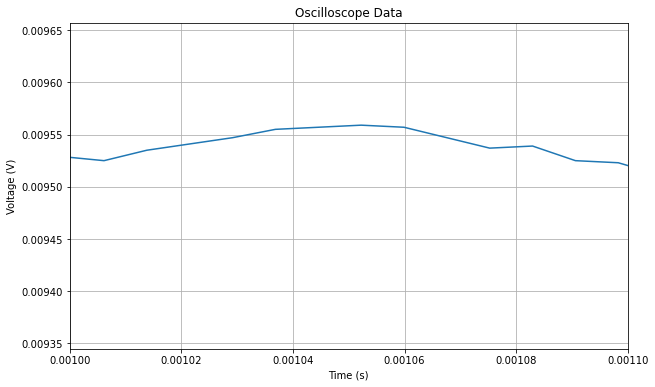

In [4]:
# import pyvisa
import matplotlib.pyplot as plt
import numpy as np

# # Initialize PyVISA resource manager
# rm = pyvisa.ResourceManager()

# # List available resources to find the oscilloscope
# print("Available resources:")
# print(rm.list_resources())

# # Replace with your oscilloscope's resource name (e.g., 'USB0::0x0699::0x0363::C065087::INSTR')
# resource_name = 'YOUR_OSCILLOSCOPE_RESOURCE_NAME'

# # Connect to the oscilloscope
# c = rm.open_resource(resource_name)
print("Connected to:", scope.query('*IDN?'))

# Setup VISA parameters
scope.timeout = 5000  # Timeout of 5000 ms
scope.write('DATA:SOU CH1')  # Use Channel 1 as data source
scope.write('DATA:WIDTH 1')
scope.write('DATA:ENC RPB')

# Acquire data from the oscilloscope
scope.write('CURVE?')
raw_data = scope.read_raw()

# Data processing
#There are some header stuff at the start of the data that need to be removed
headerlen = 2 + int(raw_data[1])
header = raw_data[:headerlen]
adc_wave = raw_data[headerlen:-1]
adc_wave = np.array(list(adc_wave))# dont know why you need to do the list but it doesnt work if you dont
# adc_wave = np.array((adc_wave))


# Convert ADC counts to voltage
ymult = float(scope.query('WFMPRE:YMULT?'))
yzero = float(scope.query('WFMPRE:YZERO?'))
yoff = float(scope.query('WFMPRE:YOFF?'))
print(yzero)
voff=2.0
# scope.write(('CH1:OFFSET %i' %voff))
scope.write(('WFMPRE:YZERO %i' %voff))

# WFMInpre:YZEro
yzero = float(scope.query('WFMPRE:YZERO?'))
print(yzero)
volts = (adc_wave - yoff) * ymult + yzero

# Generate time axis
xincr = float(scope.query('WFMPRE:XINCR?'))
time = np.arange(0, xincr * len(volts), xincr)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time, volts)
plt.title('Oscilloscope Data')
plt.xlim((0.001,0.0011))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

# Close the connection
# scope.close()

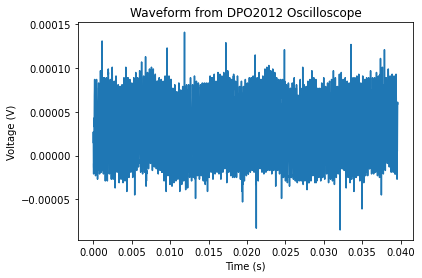

(0.0, 0.15)

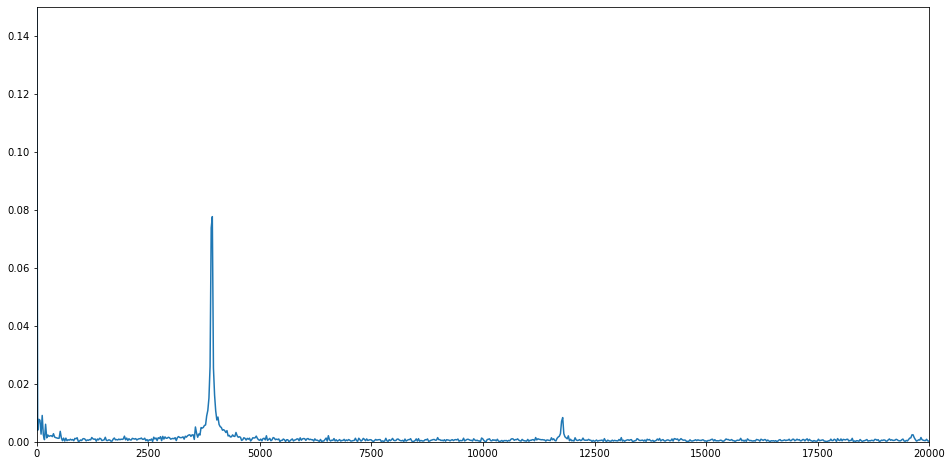

In [ ]:
raw_data

In [ ]:
from scipy.fft import fft, fftfreq, fftshift,ifftshift, fft2,ifft2,rfft2,irfft2


T = time[len(time)-1]-time[0]
X = fftshift(fft(voltages))
N = len(X)
dt = T/N
Nq = 1/(2*dt)
freq = np.arange(-Nq,Nq,1/T)
plt.figure(2,figsize = (16,8))
# plt.figure(figsize = (16,8))
plt.plot(freq,np.abs(X))

plt.xlim([0,2e4])
plt.ylim([0,0.15])

In [6]:
import DataAnaylsisFunction as scopeThread

%load_ext autoreload
%aimport UsefulFunction.GaussianBeamTypes
#%aimport UsefulFunction.PlottingFunctions
%aimport UsefulFunction.OpticalOperators

%autoreload 1

In [12]:
# ScopeID='USB0::0x0699::0x0372::C010259::INSTR'
ScopeID='USB0::1689::966::C023206::0::INSTR'
process_Scope, terminateThread=scopeThread.start_ScopeThread(ScopeID)

/Users/s4356803/opt/anaconda3/lib/python3.9/site-packages/pyvisa_py/tcpip.py:121: UserWarning: TCPIP::hislip resource discovery requires the zeroconf package to be installed... try 'pip install zeroconf'
  warnings.warn(
Process Process-4:
Traceback (most recent call last):
  File "/Users/s4356803/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/s4356803/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/s4356803/Documents/PhD/Codes/PythonCode/Oscillscope/DataAnaylsisFunction.py", line 64, in acquireDataFromScope
    scope = rm.open_resource(ScopeID,timeout=100000000)
  File "/Users/s4356803/opt/anaconda3/lib/python3.9/site-packages/pyvisa/highlevel.py", line 3292, in open_resource
    res.open(access_mode, open_timeout)
  File "/Users/s4356803/opt/anaconda3/lib/python3.9/site-packages/pyvisa/resources/resource.py", line 281, in open
    self

In [11]:
terminateThread.set()